In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [15]:
covid=pd.read_csv('CoronaVirus.csv')
covid

,Sno,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Confirmed Daily,Deaths Daily,Recovered Daily
0,0,Anhui,Mainland China,31.8257,117.2264,22/01/2020,1,0,0,1,0,0
1,1,Beijing,Mainland China,40.1824,116.4142,22/01/2020,14,0,0,14,0,0
2,2,Chongqing,Mainland China,30.0572,107.8740,22/01/2020,6,0,0,6,0,0
3,3,Fujian,Mainland China,26.0789,117.9874,22/01/2020,1,0,0,1,0,0
4,4,Gansu,Mainland China,36.0611,103.8343,22/01/2020,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4636,4636,Luxembourg,Luxembourg,49.8153,6.1296,29/02/2020,1,0,0,1,0,0
4637,4637,Monaco,Monaco,43.7333,7.4167,29/02/2020,1,0,0,1,0,0
4638,4638,Qatar,Qatar,25.3548,51.1839,29/02/2020,1,0,0,1,0,0
4639,4639,"Portland, OR",US,45.5051,-122.6750,29/02/2020,1,0,0,1,0,0


# Data set information



In [16]:
covid.shape

(4641, 12)

 **<span style="color:green">View some basic statistical details</span>**

In [17]:
covid.describe()

,Sno,Lat,Long,Confirmed,Deaths,Recovered,Confirmed Daily,Deaths Daily,Recovered Daily
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,2320.000000,32.195406,40.126887,368.560655,10.296703,82.231847,18.533290,0.633700,8.571860
std,1339.885629,20.222204,85.487469,3924.150435,137.480856,965.945974,277.834601,8.197499,109.624652
min,0.000000,-40.900600,-123.869500,0.000000,0.000000,0.000000,-20.000000,0.000000,-4.000000
25%,1160.000000,26.078900,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2320.000000,35.443700,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3480.000000,43.666100,113.550000,26.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,4640.000000,64.963100,174.886000,66337.000000,2727.000000,28993.000000,14840.000000,242.000000,3418.000000


**<span style="color:green">View column information</span>**

In [18]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              4641 non-null   int64  
 1   Province/State   4641 non-null   object 
 2   Country/Region   4641 non-null   object 
 3   Lat              4641 non-null   float64
 4   Long             4641 non-null   float64
 5   Date             4641 non-null   object 
 6   Confirmed        4641 non-null   int64  
 7   Deaths           4641 non-null   int64  
 8   Recovered        4641 non-null   int64  
 9   Confirmed Daily  4641 non-null   int64  
 10  Deaths Daily     4641 non-null   int64  
 11  Recovered Daily  4641 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 435.2+ KB


In [19]:
#count day
len(covid['Date'].unique())

39

# Data preprocessing

In [20]:
del covid['Sno']

In [21]:
covid.rename(columns={'Country/Region':'Country','Province/State':'Province'},inplace=True)

In [22]:
covid['Country'].replace('Mainland China','China',inplace=True)

In [23]:
covid

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Confirmed Daily,Deaths Daily,Recovered Daily
0,Anhui,China,31.8257,117.2264,22/01/2020,1,0,0,1,0,0
1,Beijing,China,40.1824,116.4142,22/01/2020,14,0,0,14,0,0
2,Chongqing,China,30.0572,107.8740,22/01/2020,6,0,0,6,0,0
3,Fujian,China,26.0789,117.9874,22/01/2020,1,0,0,1,0,0
4,Gansu,China,36.0611,103.8343,22/01/2020,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4636,Luxembourg,Luxembourg,49.8153,6.1296,29/02/2020,1,0,0,1,0,0
4637,Monaco,Monaco,43.7333,7.4167,29/02/2020,1,0,0,1,0,0
4638,Qatar,Qatar,25.3548,51.1839,29/02/2020,1,0,0,1,0,0
4639,"Portland, OR",US,45.5051,-122.6750,29/02/2020,1,0,0,1,0,0


**<span style='color:green'>FOR MAP</span>**

In [142]:
covid_confirmed_agg = covid.groupby('Country')['Lat','Long','Confirmed'].sum().reset_index()
covid_confirmed_agg.loc[:, ['Lat', 'Long']] = covid.groupby('Country').mean().reset_index().loc[:, ['Lat', 'Long']]
covid_confirmed_agg = covid_confirmed_agg[covid_confirmed_agg.iloc[:, 3:].max(axis=1) > 1000]
covid_confirmed_agg

<ipython-input-142-52780aa26205>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Lat,Long,Confirmed
10,China,33.406936,111.542903,1669432
20,Hong Kong,22.300000,114.200000,1608
23,Iran,32.000000,53.000000,1617
27,Italy,43.000000,12.000000,3968
28,Japan,36.000000,138.000000,2412
44,Others,35.443700,139.638000,10076
51,Singapore,1.283300,103.833300,1848
52,South Korea,36.000000,128.000000,12164
58,Thailand,15.000000,101.000000,1026


In [198]:
covid_confirmed_agg_long = pd.melt(covid_confirmed_agg,
                                   id_vars=covid_confirmed_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=covid_confirmed_agg.iloc[:, 3:],
                                   value_name='date_confirmed_cases')

In [24]:
Country_province=covid.groupby(['Country','Province'])['Confirmed','Deaths','Recovered'].sum()

<ipython-input-24-25ea988da9b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Country_province=covid.groupby(['Country','Province'])['Confirmed','Deaths','Recovered'].sum()


**<span style='color:green'>FOR WORLD SITUATION ANALYSIS</span>**

In [26]:
covid2=covid[['Confirmed','Recovered','Deaths']]
covid2

,Confirmed,Recovered,Deaths
0,1,0,0
1,14,0,0
2,6,0,0
3,1,0,0
4,0,0,0
...,...,...,...
4636,1,0,0
4637,1,0,0
4638,1,0,0
4639,1,0,0


In [27]:
covid2_confirmed_count=covid2['Confirmed'].sum()
covid2_recovered_count=covid2['Recovered'].sum()
covid2_death_count=covid2['Deaths'].sum()

In [28]:
World_situation=pd.DataFrame({'Confirmed':[covid2_confirmed_count],
                             'Recovered':[covid2_recovered_count],
                             'Death':[covid2_death_count],
                              'Active_case':[covid2_confirmed_count-covid2_recovered_count-covid2_death_count]
                             },index=['Total'])
World_situation

,Confirmed,Recovered,Death,Active_case
Total,1710490,381638,47787,1281065


In [29]:
#many column to many rows using melt function and value vars to unpivot a column
world=pd.melt(World_situation,value_vars=['Recovered','Death','Confirmed','Active_case'],var_name='Status',value_name='Count')
world

,Status,Count
0,Recovered,381638
1,Death,47787
2,Confirmed,1710490
3,Active_case,1281065


In [51]:
world['Count']=np.divide(world['Count'],1000)
world.rename(columns={'Count':'Count(K)'},inplace=True)
world

,Status,Count(K)
0,Recovered,381.638
1,Death,47.787
2,Confirmed,1710.490
3,Active_case,1281.065


In [199]:
fig = px.scatter_geo(covid_confirmed_agg_long,
                     lat="Lat", lon="Long", color="Country",
                     hover_name="Country", size="date_confirmed_cases",
                     size_max=200, animation_frame="date",
                     template='plotly_dark', projection="orthographic",
                     title="COVID-19 worldwide confirmed cases over time")

In [200]:
fig

In [90]:
World=pd.melt(World_situation,value_vars=['Recovered','Death','Confirmed','Active_case']
                  ,var_name='Status',value_name='Count')
World

,Status,Count
0,Recovered,381638
1,Death,47787
2,Confirmed,1710490
3,Active_case,1281065


In [203]:
fig = px.treemap(World, path=["Status"], values="Count",
                 color_discrete_sequence=['#3498db', '#2ecc71', '#e74c3c'],
                 template='plotly_dark',title="WORLD SITUATION USING TREEMAPS")

In [204]:
fig

# **<span style="color:orange">World situation data </span>**

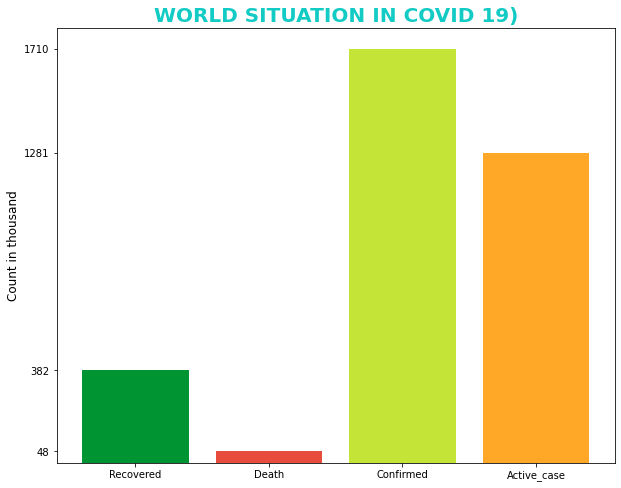

In [52]:
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.title(label="WORLD SITUATION IN COVID 19)",fontsize=20,color='#12CBC4',fontweight='bold')
plt.bar(world['Status'],world['Count(K)'],color = ['#009432','#e74c3c','#C4E538','#FFA726'])
plt.ylabel('Count in thousand',fontsize=12)
plt.yticks(world['Count(K)'])
plt.show()

# Country wise

In [32]:
confirmed=covid.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(6)

In [33]:
confirmed

Country
China          1669432
South Korea      12164
Others           10076
Italy             3968
Japan             2412
Singapore         1848
Name: Confirmed, dtype: int64

In [34]:
confirmed_by_date=covid.groupby('Country')['Date','Confirmed'].sum()

<ipython-input-34-743afd5434ed>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  confirmed_by_date=covid.groupby('Country')['Date','Confirmed'].sum()


In [60]:
df=pd.DataFrame(confirmed_by_date)
largest_confirmed=df.nlargest(6,'Confirmed')
largest_confirmed

,Confirmed
Country,
China,1669432
South Korea,12164
Others,10076
Italy,3968
Japan,2412
Singapore,1848


In [61]:
area=list(largest_confirmed['Confirmed'])
area=area[1:]
area


[12164, 10076, 3968, 2412, 1848]

In [62]:
labels=list(largest_confirmed.index)
labels=labels[1:]
labels

['South Korea', 'Others', 'Italy', 'Japan', 'Singapore']

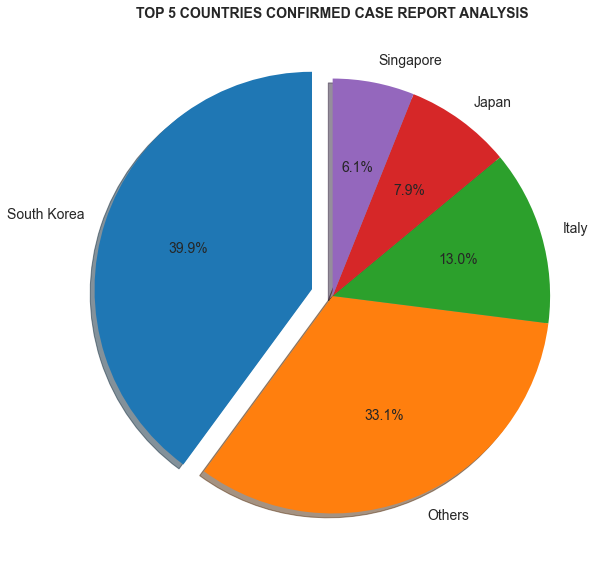

In [205]:
plt.figure(figsize=(20,10))
plt.title(label='TOP 5 COUNTRIES CONFIRMED CASE REPORT ANALYSIS',fontweight='bold',fontsize=14)
plt.pie(area,labels=labels,shadow='true',autopct='%1.1f%%',startangle=90,explode=[0.1, 0, 0, 0,0],textprops={'fontsize': 14})
plt.show()

In [206]:
fig = px.pie(values=area, names=labels,title='TOP 5 COUNTRIES CONFIRMED CASE REPORT ANALYSIS',
             color=['#ff6348','#1e90ff','#2ed573','#3742fa','#747d8c'])
fig.show()

**<span style='color:#ffa502'>RECOVERED RATE AND MORTALITY RATE</span>**

In [39]:
World_situation

,Confirmed,Recovered,Death,Active_case
Total,1710490,381638,47787,1281065


In [184]:
World_situation['Recovered rate']=round(World_situation['Recovered']/World_situation['Confirmed']*100,2)
World_situation['Mortality rate']=round(World_situation['Death']/World_situation['Confirmed']*100,2)

In [185]:
World_r_m=pd.melt(World_situation,value_vars=['Recovered','Death','Confirmed','Active_case','Recovered rate',
                                             'Mortality rate'],var_name='Status',value_name='Count')
World_r_m

,Status,Count
0,Recovered,381638.00
1,Death,47787.00
2,Confirmed,1710490.00
3,Active_case,1281065.00
4,Recovered rate,22.31
5,Mortality rate,2.79


In [41]:
r=World_r_m.iloc[4]
m=World_r_m.iloc[5]
name=r[0],m[0]
value=r[1],m[1]

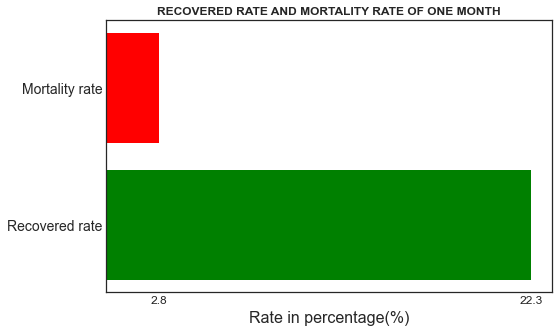

In [207]:
plt.figure(figsize=(8,5))
plt.barh(y=name,width=value,color=['green','red'])
plt.title('RECOVERED RATE AND MORTALITY RATE OF ONE MONTH',fontweight='bold')
plt.xlabel('Rate in percentage(%)',fontsize=16)
plt.xticks(value,fontsize=12)
plt.yticks(name,fontsize=14)
plt.show()

# USA CONDITION ANALYSIS

In [43]:
Country_province

Confirmed  \
Country              Province                                                 
Afghanistan          Afghanistan                                          6   
Algeria              Algeria                                              5   
Australia            From Diamond Princess                               55   
                     New South Wales                                    139   
                     Queensland                                         142   
...                                                                     ...   
US                   Tempe, AZ                                           35   
                     Travis, CA (From Diamond Princess)                  15   
                     Unassigned Location (From Diamond Princess)        244   
United Arab Emirates United Arab Emirates                               280   
Vietnam              Vietnam                                            416   

                                                                  Deaths  \
Country              Province                                              
Afghanistan          Afghanistan                                       0   
Algeria              Algeria                                           0   
Australia            From Diamond Princess                             0   
                     New South Wales                                   0   
                     Queensland                                        0   
...                                                                  ...   
US                   Tempe, AZ                                         0   
                     Travis, CA (From Diamond Princess)                0   
                     Unassigned Location (From Diamond Princess)       0   
United Arab Emirates United Arab Emirates                              0   
Vietnam              Vietnam                                           0   

                                                                  Recovered  
Country              Province                                                
Afghanistan          Afghanistan                                          0  
Algeria              Algeria                                              0  
Australia            From Diamond Princess                                0  
                     New South Wales                                     96  
                     Queensland                                           9  
...                                                                     ...  
US                   Tempe, AZ                                            5  
                     Travis, CA (From Diamond Princess)                   0  
                     Unassigned Location (From Diamond Princess)          0  
United Arab Emirates United Arab Emirates                                64  
Vietnam              Vietnam                                            214  

[119 rows x 3 columns]

**STYLISH SIZE BAR**

In [44]:
us_old=Country_province.loc['US'].sort_values('Confirmed',ascending=False)
us=us_old.head(5)
us.style.bar(subset=['Confirmed','Deaths','Recovered'],color='#badc58')

,Confirmed,Deaths,Recovered
Province,,,
Unassigned Location (From Diamond Princess),244,0,0
"Chicago, IL",67,0,42
"Santa Clara, CA",58,0,9
"San Benito, CA",54,0,0
"Seattle, WA",44,1,21


In [45]:
us.style.highlight_max(axis=0)

,Confirmed,Deaths,Recovered
Province,,,
Unassigned Location (From Diamond Princess),244,0,0
"Chicago, IL",67,0,42
"Santa Clara, CA",58,0,9
"San Benito, CA",54,0,0
"Seattle, WA",44,1,21


In [46]:
us.style.highlight_min(axis=0,color='#95afc0')

,Confirmed,Deaths,Recovered
Province,,,
Unassigned Location (From Diamond Princess),244,0,0
"Chicago, IL",67,0,42
"Santa Clara, CA",58,0,9
"San Benito, CA",54,0,0
"Seattle, WA",44,1,21


In [189]:
a=us.index
a=list(a)
a

['Unassigned Location (From Diamond Princess)',
 'Chicago, IL',
 'Santa Clara, CA',
 'San Benito, CA',
 'Seattle, WA']

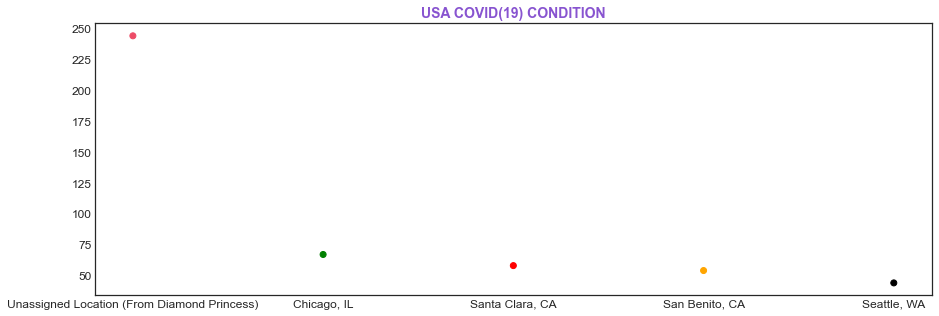

In [194]:
plt.figure(figsize=(15,5))
plt.title("USA COVID(19) CONDITION",fontsize=14,color='#8854d0',fontweight='bold')
plt.scatter(a,us['Confirmed'],color=['#ED4C67','green','red','orange','black'])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [176]:
a=Date_wise.index
a=list(a)

In [73]:
Date_wise['Date']=a

In [74]:
Date_wise

,Confirmed,Deaths,Recovered,Date
Date,,,,
1/2/2020,12038,259,284,1/2/2020
10/2/2020,42763,1013,3946,10/2/2020
11/2/2020,44803,1113,4683,11/2/2020
12/2/2020,45222,1118,5150,12/2/2020
13/02/2020,60370,1371,6295,13/02/2020
14/02/2020,66887,1523,8058,14/02/2020
15/02/2020,69032,1666,9395,15/02/2020
16/02/2020,71226,1770,10865,16/02/2020
17/02/2020,73260,1868,12583,17/02/2020


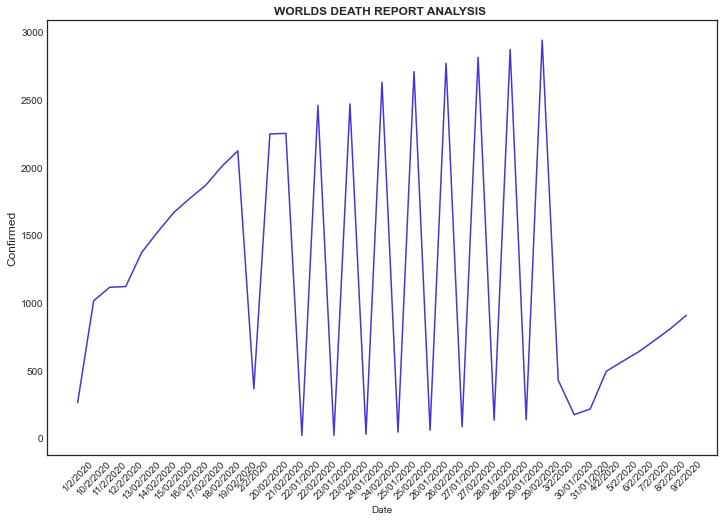

In [88]:
plt.figure(figsize=(12,8))
plt.plot(Date_wise["Date"], Date_wise["Deaths"],color='#4834d4')
plt.title("WORLDS DEATH REPORT ANALYSIS ",fontweight='bold')
plt.xlabel('Date')
plt.xticks(Date_wise["Date"],rotation=45)
plt.ylabel('Confirmed',fontsize=12)
plt.style.use('seaborn-white')

**<span style='color:green'>DATEWISE CONFIRMED,RECOVERED,DEATHS ANALYSIS</span>**

In [93]:
Date_wise

,Confirmed,Deaths,Recovered,Date
Date,,,,
1/2/2020,12038,259,284,1/2/2020
10/2/2020,42763,1013,3946,10/2/2020
11/2/2020,44803,1113,4683,11/2/2020
12/2/2020,45222,1118,5150,12/2/2020
13/02/2020,60370,1371,6295,13/02/2020
14/02/2020,66887,1523,8058,14/02/2020
15/02/2020,69032,1666,9395,15/02/2020
16/02/2020,71226,1770,10865,16/02/2020
17/02/2020,73260,1868,12583,17/02/2020


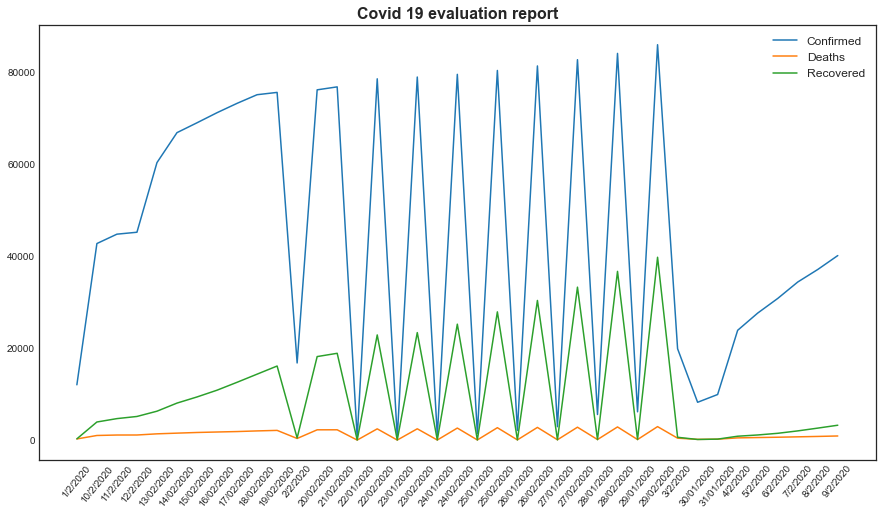

In [196]:
plt.figure(figsize=(15,8))
plt.title("Covid 19 evaluation report",fontsize=16,fontweight='bold')
plt.plot(Date_wise['Date'], Date_wise['Confirmed'])
plt.plot(Date_wise['Date'], Date_wise['Deaths'])
plt.plot(Date_wise['Date'], Date_wise['Recovered'])
plt.legend(['Confirmed','Deaths','Recovered'],fontsize=12)
plt.xticks(Date_wise['Date'],rotation=50)

plt.show()